## Exploration

Sample shape: (100000, 6)
             Id   ProductId          UserId  \
327337  1035185  B000KLQUV2  A3GUZIX0ITZORF   
276864   431435  6304680724  A26BWRBPP4V2WF   
904589  1413559  B004LROMWU  A10CRY9MFXE3HH   
382585   535298  B00003CXS4  A34974VMNZKRAT   
878200  1392921  B004A8ZX32   AHCA0TKJE4MFL   

                                                  Summary  \
327337                          "Just say, 'NO' to Jesus"   
276864  Future events such as these will affect you in...   
904589                                            It's OK   
382585                                          Brilliant   
878200                        Takes More than One Viewing   

                                                     Text  Score  
327337  Like most of the other reviewers here say, thi...    5.0  
276864  There are two kinds of bad movies - the kind t...    4.0  
904589  It certainly a watchable series and I'm rootin...    3.0  
382585  You may not be a Brad Pitt fan.  That's okay! ..

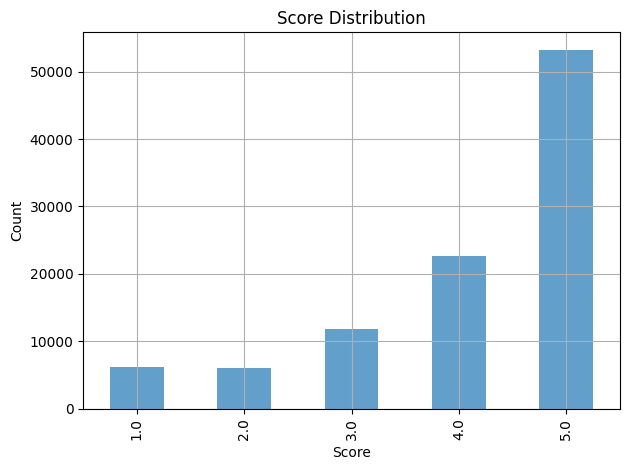

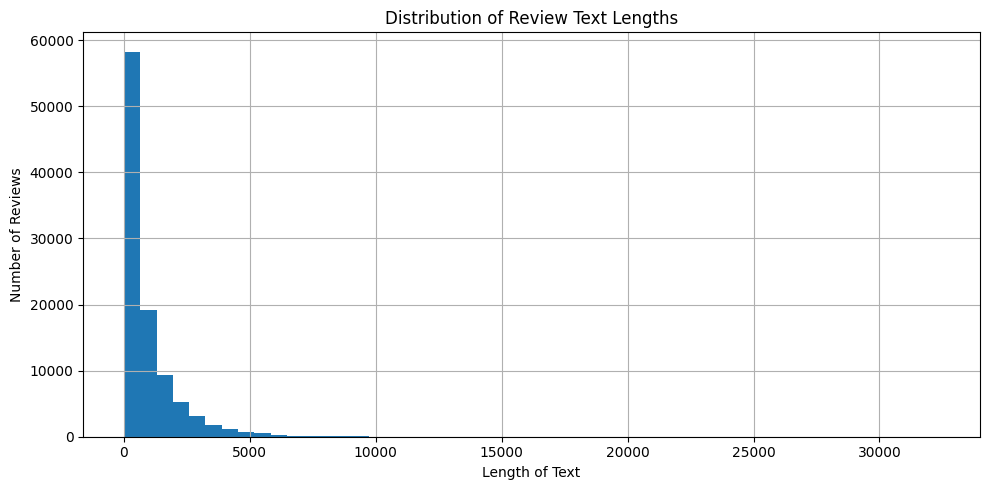

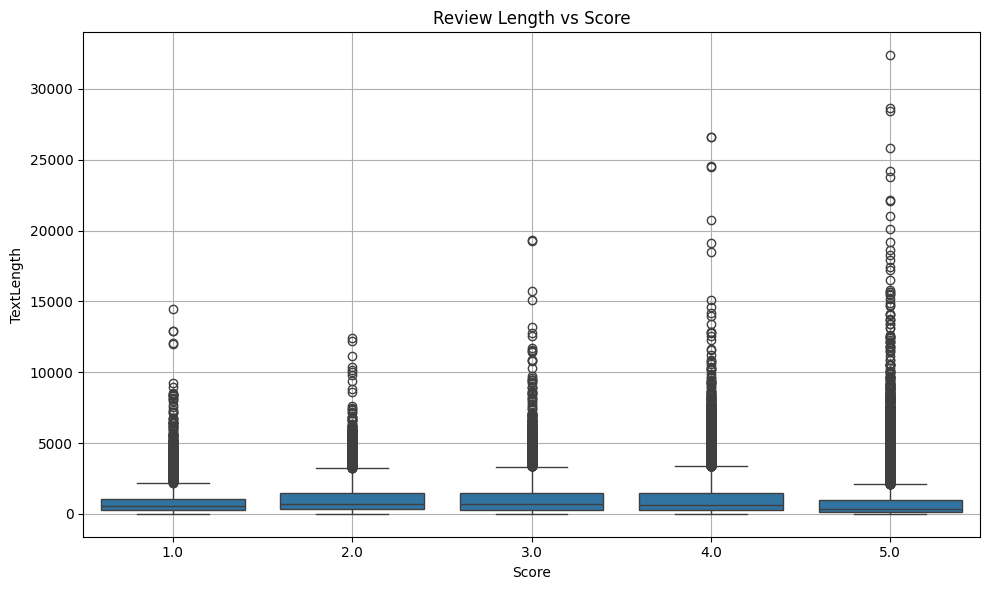

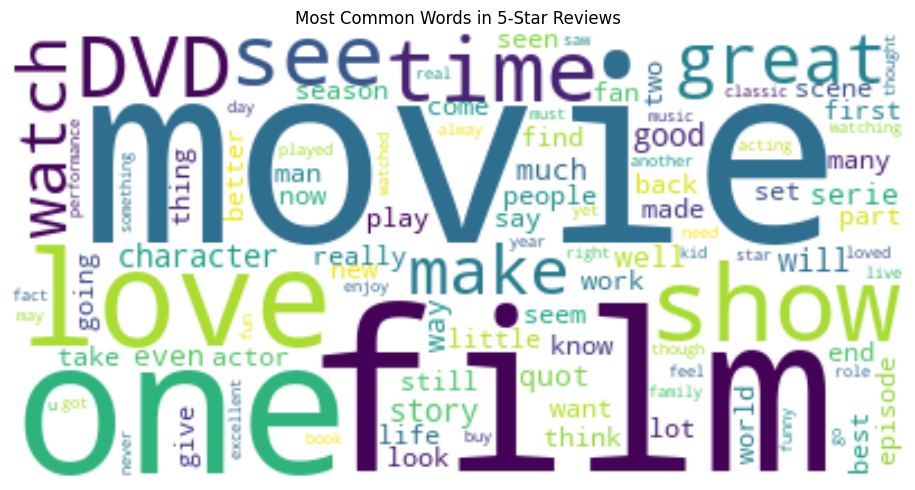

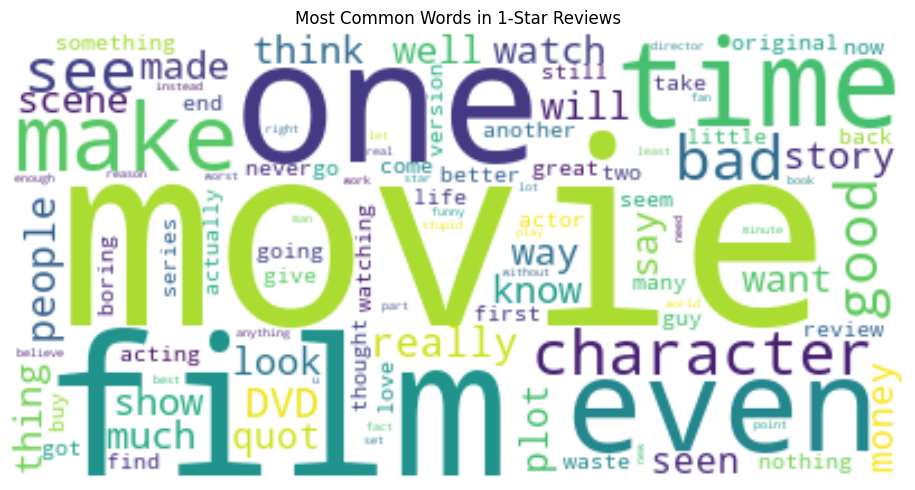

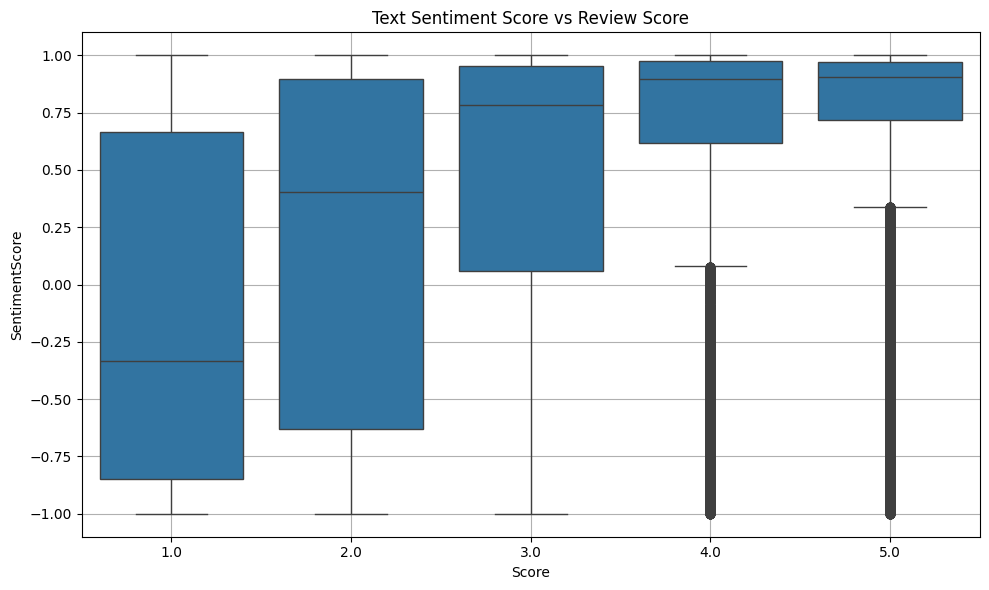

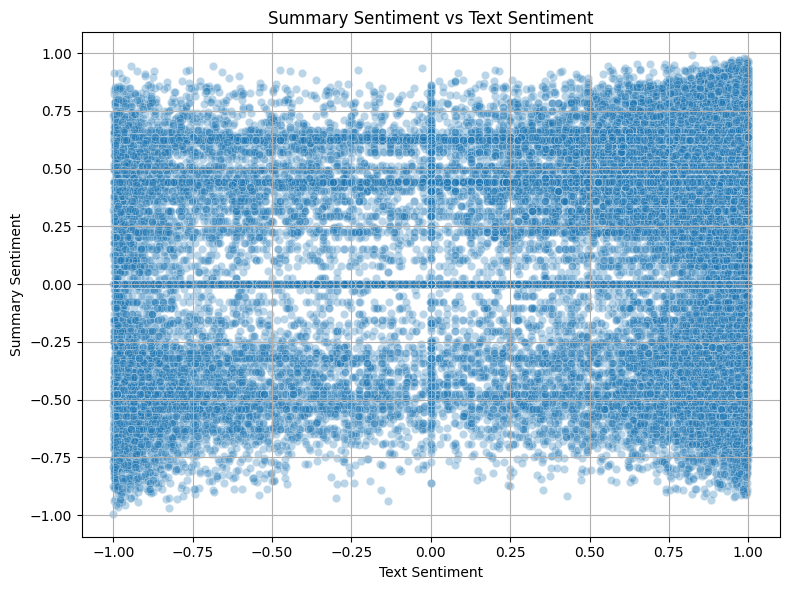

Correlation between text and summary sentiment: 0.2793


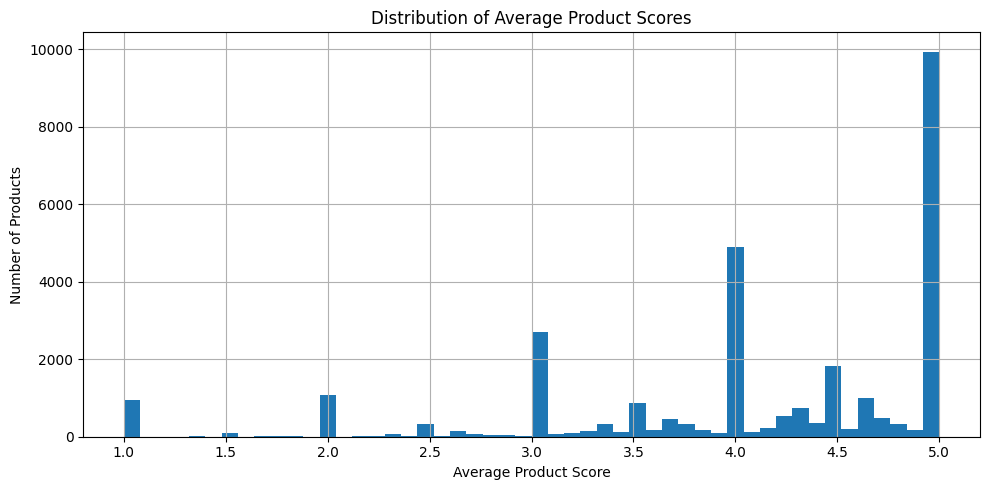

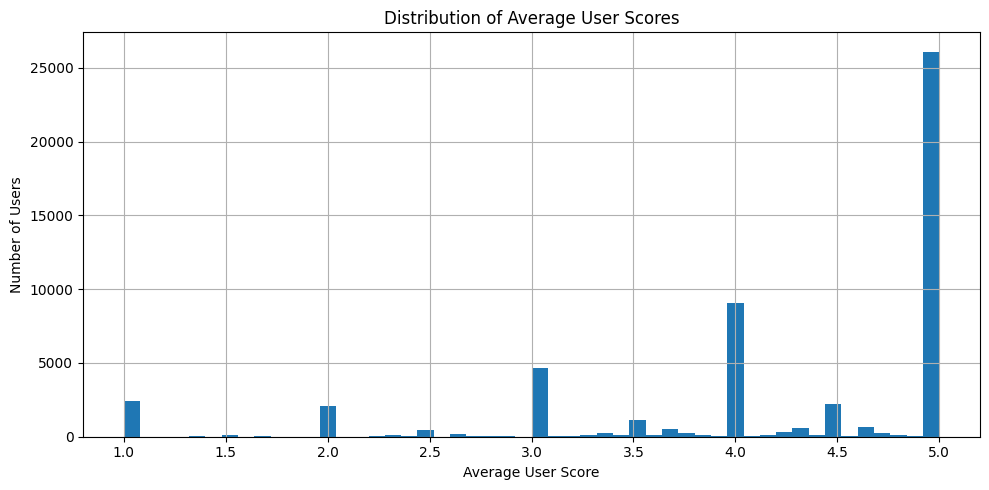

Correlation between ProductAvgScore and Score: 0.6493
Correlation between UserAvgScore and Score: 0.8019


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

# Load and clean the data
df = pd.read_csv("./data/train.csv")

# Remove rows with missing Score, Text, or Summary
df_clean = df.dropna(subset=['Score', 'Text', 'Summary'])

# Sample 100,000 labeled rows
sample_df = df_clean.sample(n=100_000, random_state=42).copy()

# =================== Basic Info =================== #
print("Sample shape:", sample_df.shape)
print(sample_df.head())

# =================== Class Distribution =================== #
score_counts = sample_df['Score'].value_counts().sort_index()
score_counts.plot(kind='bar', title='Score Distribution', alpha=0.7)
plt.xlabel("Score")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# =================== Review Lengths =================== #
sample_df['TextLength'] = sample_df['Text'].apply(len)
sample_df['SummaryLength'] = sample_df['Summary'].apply(len)

# Histogram of Text Lengths
plt.figure(figsize=(10,5))
sample_df['TextLength'].hist(bins=50)
plt.title("Distribution of Review Text Lengths")
plt.xlabel("Length of Text")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot: Text Length vs Score
plt.figure(figsize=(10,6))
sns.boxplot(x='Score', y='TextLength', data=sample_df)
plt.title("Review Length vs Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# =================== Word Clouds =================== #
def generate_wordcloud(df_subset, title):
    text = ' '.join(df_subset['Text'].dropna().astype(str).tolist())
    wordcloud = WordCloud(max_words=100, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.tight_layout()
    plt.show()

generate_wordcloud(sample_df[sample_df['Score'] == 5], "Most Common Words in 5-Star Reviews")
generate_wordcloud(sample_df[sample_df['Score'] == 1], "Most Common Words in 1-Star Reviews")

# =================== Sentiment Analysis =================== #
analyzer = SentimentIntensityAnalyzer()

# Text sentiment
sample_df['SentimentScore'] = sample_df['Text'].astype(str).apply(
    lambda x: analyzer.polarity_scores(x)['compound']
)

# Summary sentiment
sample_df['SummarySentiment'] = sample_df['Summary'].astype(str).apply(
    lambda x: analyzer.polarity_scores(x)['compound']
)

# Boxplot: Sentiment Score vs Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score', y='SentimentScore', data=sample_df)
plt.title("Text Sentiment Score vs Review Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# Compare Summary vs Text sentiment
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=sample_df,
    x='SentimentScore',
    y='SummarySentiment',
    alpha=0.3
)
plt.title("Summary Sentiment vs Text Sentiment")
plt.xlabel("Text Sentiment")
plt.ylabel("Summary Sentiment")
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation between Text and Summary sentiment
corr_sent = sample_df[['SentimentScore', 'SummarySentiment']].corr().iloc[0, 1]
print(f"Correlation between text and summary sentiment: {corr_sent:.4f}")

# =================== Product and User Features =================== #
# Product average score
product_avg = sample_df.groupby('ProductId')['Score'].mean()
sample_df['ProductAvgScore'] = sample_df['ProductId'].map(product_avg)

# User average score
user_avg = sample_df.groupby('UserId')['Score'].mean()
sample_df['UserAvgScore'] = sample_df['UserId'].map(user_avg)

# Product score histogram
product_avg.hist(bins=50, figsize=(10, 5))
plt.title("Distribution of Average Product Scores")
plt.xlabel("Average Product Score")
plt.ylabel("Number of Products")
plt.grid(True)
plt.tight_layout()
plt.show()

# User score histogram
user_avg.hist(bins=50, figsize=(10, 5))
plt.title("Distribution of Average User Scores")
plt.xlabel("Average User Score")
plt.ylabel("Number of Users")
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlations
corr_product = sample_df[['ProductAvgScore', 'Score']].corr().iloc[0, 1]
corr_user = sample_df[['UserAvgScore', 'Score']].corr().iloc[0, 1]
print(f"Correlation between ProductAvgScore and Score: {corr_product:.4f}")
print(f"Correlation between UserAvgScore and Score: {corr_user:.4f}")

# Save for later if needed
sample_df.to_csv("exploration_sample.csv", index=False)


What we see from this graphs and charts is that the data is highly skewed towards 5 start reviews. Moreover when we graph the text sentiment score and the review score we see a bit of correlation so graphing the sentiment score for each star review and seeing if those graphs have significant differences might be a good idea. When we graph the text length and the review score we can't really see something very distinctive. Looking at the word cloud for different review scores, analysing the frequency of certain words might be a good idea.

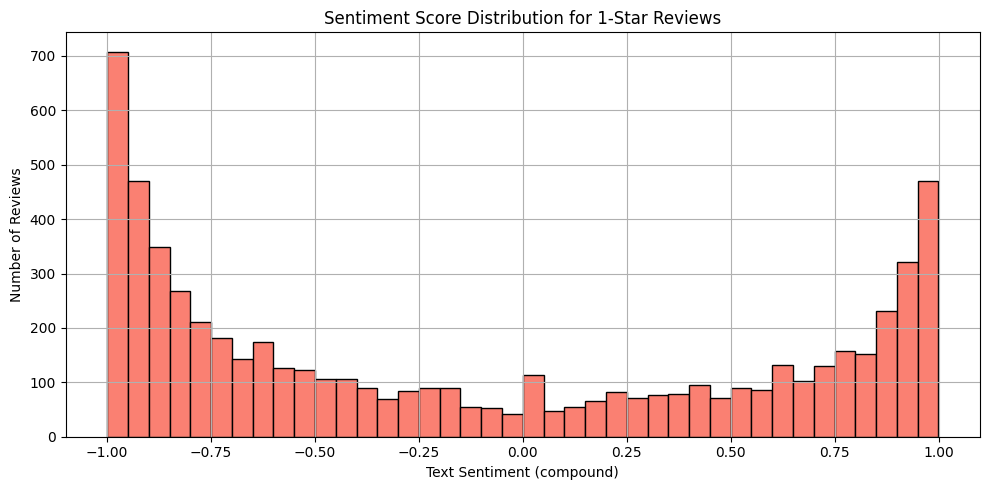

In [9]:
import matplotlib.pyplot as plt

# Filter only 1-star reviews
one_star_reviews = sample_df[sample_df['Score'] == 1]

# Plot sentiment distribution
plt.figure(figsize=(10, 5))
plt.hist(one_star_reviews['SentimentScore'], bins=40, color='salmon', edgecolor='black')
plt.title("Sentiment Score Distribution for 1-Star Reviews")
plt.xlabel("Text Sentiment (compound)")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.tight_layout()
plt.show()


<module 'matplotlib.pyplot' from '/Users/mehmetborasarioglu/miniconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

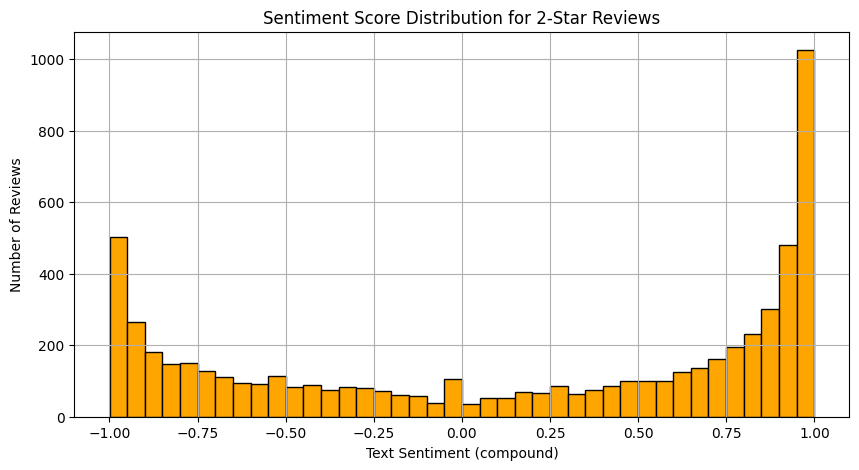

In [10]:
# 2-Star Reviews
two_star_reviews = sample_df[sample_df['Score'] == 2]

plt.figure(figsize=(10, 5))
plt.hist(two_star_reviews['SentimentScore'], bins=40, color='orange', edgecolor='black')
plt.title("Sentiment Score Distribution for 2-Star Reviews")
plt.xlabel("Text Sentiment (compound)")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt


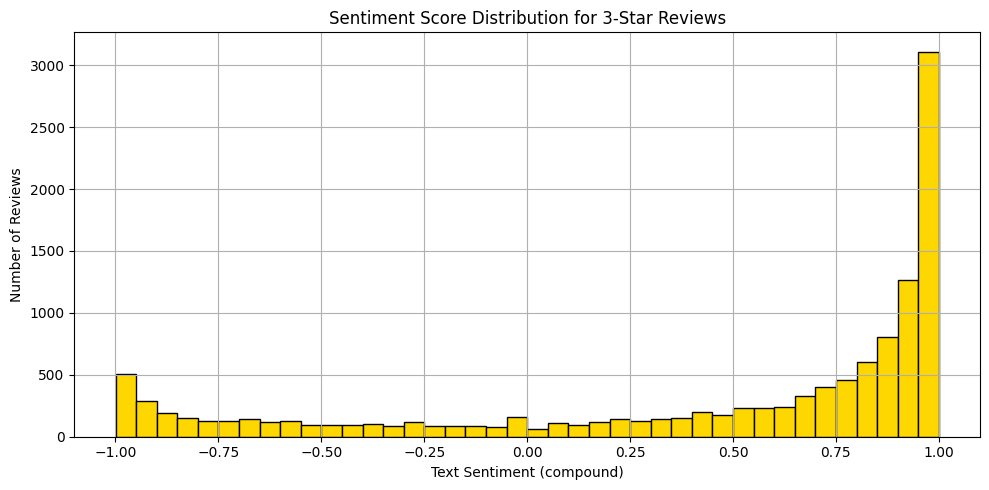

In [11]:
# 3-Star Reviews
three_star_reviews = sample_df[sample_df['Score'] == 3]

plt.figure(figsize=(10, 5))
plt.hist(three_star_reviews['SentimentScore'], bins=40, color='gold', edgecolor='black')
plt.title("Sentiment Score Distribution for 3-Star Reviews")
plt.xlabel("Text Sentiment (compound)")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Score', y='SummarySentiment', data=sample_df)
plt.title("Summary Sentiment Score vs. Review Score")
plt.xlabel("Review Score")
plt.ylabel("Summary Sentiment (compound)")
plt.grid(True)
plt.tight_layout()
plt.show()


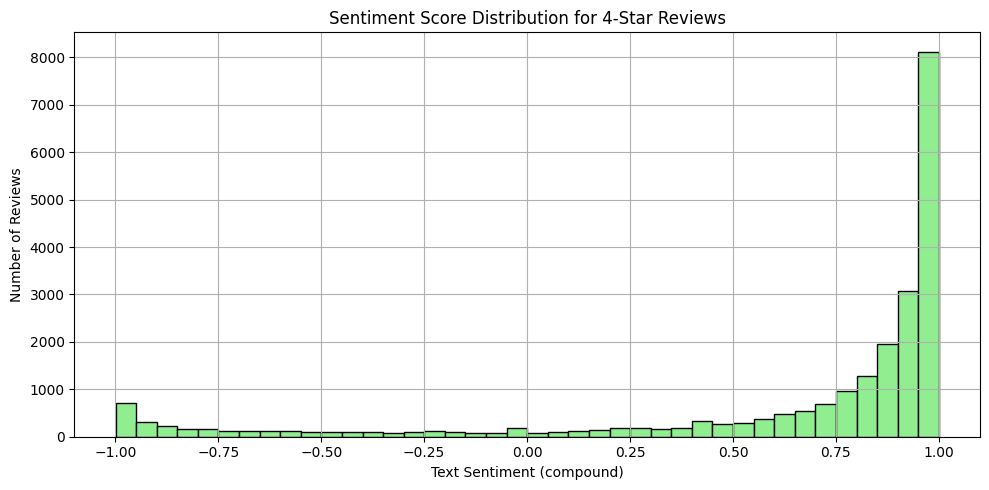

In [12]:
# 4-Star Reviews
four_star_reviews = sample_df[sample_df['Score'] == 4]

plt.figure(figsize=(10, 5))
plt.hist(four_star_reviews['SentimentScore'], bins=40, color='lightgreen', edgecolor='black')
plt.title("Sentiment Score Distribution for 4-Star Reviews")
plt.xlabel("Text Sentiment (compound)")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.tight_layout()
plt.show()


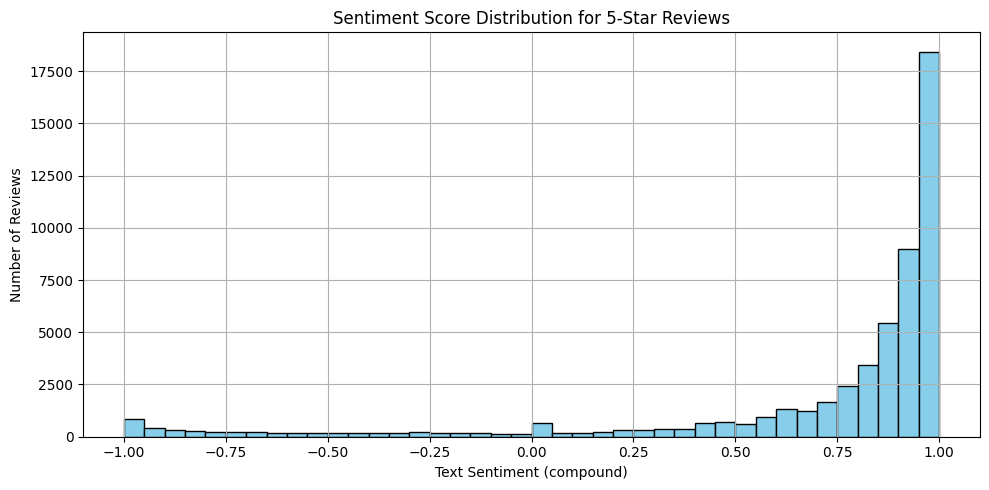

In [13]:
# 5-Star Reviews
five_star_reviews = sample_df[sample_df['Score'] == 5]

plt.figure(figsize=(10, 5))
plt.hist(five_star_reviews['SentimentScore'], bins=40, color='skyblue', edgecolor='black')
plt.title("Sentiment Score Distribution for 5-Star Reviews")
plt.xlabel("Text Sentiment (compound)")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.tight_layout()
plt.show()


Now that we have plotted the the sentiment values for different review scores we see that mid to low score's have some low sentiment valued reviews but not a whole lot. But adding this as a parameter might be a good idea to distinguish 1 star rated products then the rest.

In [14]:
import pandas as pd

# Load datasets
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

# Split train.csv into labeled and unlabeled parts
train_labeled_df = train_df[train_df["Score"].notna()].copy()
train_unlabeled_df = train_df[train_df["Score"].isna()].copy()

# Extract the rows to be predicted using test.csv
test_rows = train_df.loc[test_df["Id"]]

# Get unique users/products from labeled training data
train_users = set(train_labeled_df["UserId"].dropna().unique())
train_products = set(train_labeled_df["ProductId"].dropna().unique())

# Get users/products from test rows
test_users = set(test_rows["UserId"].dropna().unique())
test_products = set(test_rows["ProductId"].dropna().unique())

# Find unseen users/products in the test set
unseen_users = test_users - train_users
unseen_products = test_products - train_products

# Report
print(f"❓ Users in test not in train_labeled_df: {len(unseen_users)}")
print(f"❓ Products in test not in train_labeled_df: {len(unseen_products)}")

# Optional: look at a few examples
print("\n🔍 Sample of unseen users:", list(unseen_users)[:5])
print("🔍 Sample of unseen products:", list(unseen_products)[:5])


❓ Users in test not in train_labeled_df: 1
❓ Products in test not in train_labeled_df: 0

🔍 Sample of unseen users: ['A1YPELVB6ZOV8E']
🔍 Sample of unseen products: []


We see there is only a single user that has not previously made a review in our test dataset which is not a big problem.

There is a single user which is not seen in the train data.

In [ ]:
# 📈 Correlation
text_corr = train_df["TextTypos"].corr(train_df["Score"])
summary_corr = train_df["SummaryTypos"].corr(train_df["Score"])
print(text_corr)
print(summary_corr)

-0.020755551490112198
-0.024046531440825546


## Feature Extraction

Use target encoding since one-hot encoding might result in too big data structures and label encoding doesn't make a whole lot of sense in our example since there is not natural order between users and products.

Now we start our feature extraction.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load full dataset
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

# Split labeled vs unlabeled
train_labeled_df = train_df[train_df["Score"].notna()].copy()
train_unlabeled_df = train_df[train_df["Score"].isna()].copy()

# Split labeled into train/val (you will train on this, validate on the rest)
train_labeled_df_train, train_labeled_df_val = train_test_split(
    train_labeled_df, test_size=0.2, random_state=42, stratify=train_labeled_df["Score"]
)

# Reconstruct full train_df with val & unlabeled rows
train_df = pd.concat([train_labeled_df_train, train_labeled_df_val, train_unlabeled_df], axis=0)

# ⚠️ From here on, use only train_labeled_df_train to compute biases and averages

# --- Step 1: Global Mean ---
global_mean = train_labeled_df_train["Score"].mean()

# --- Step 2: Product Average Score & ProductBias ---
product_avg = train_labeled_df_train.groupby("ProductId")["Score"].mean()
train_df["ProductAvgScore"] = train_df["ProductId"].map(product_avg)
train_df["ProductBias"] = train_df["ProductAvgScore"] - global_mean

# --- Step 3: UserBias ---
train_labeled_df_train["UserDeviation"] = train_labeled_df_train["Score"] - train_labeled_df_train["ProductId"].map(product_avg)
user_bias = train_labeled_df_train.groupby("UserId")["UserDeviation"].mean()
train_df["UserBias"] = train_df["UserId"].map(user_bias)

# --- Step 4: Review Counts ---
user_review_count = train_labeled_df_train["UserId"].value_counts()
product_review_count = train_labeled_df_train["ProductId"].value_counts()
train_df["UserReviewCount"] = train_df["UserId"].map(user_review_count)
train_df["ProductReviewCount"] = train_df["ProductId"].map(product_review_count)

# --- Step 5: Fill missing values for unseen users/products ---
train_df["ProductAvgScore"] = train_df["ProductAvgScore"].fillna(global_mean)
train_df["ProductBias"] = train_df["ProductBias"].fillna(0)
train_df["UserBias"] = train_df["UserBias"].fillna(0)
train_df["UserReviewCount"] = train_df["UserReviewCount"].fillna(0)
train_df["ProductReviewCount"] = train_df["ProductReviewCount"].fillna(0)


Droping ProductAvgScore and UserAvgScore since our data is highly biased towards 5 stars reviews and I don't want the model to learn that. Then we scale our features before feeding it to our model.

In [2]:
from sklearn.preprocessing import StandardScaler

# Drop biased average features
train_df.drop(columns=["ProductAvgScore", "UserAvgScore"], inplace=True, errors='ignore')

# Features to scale
features_to_scale = ["ProductBias", "UserBias", "UserReviewCount", "ProductReviewCount"]

# Fill any remaining NaNs just in case
train_df[features_to_scale] = train_df[features_to_scale].fillna(0)

# Standard scaling
scaler = StandardScaler()
train_df[features_to_scale] = scaler.fit_transform(train_df[features_to_scale])


In [3]:
# Replace any NaN in "Text" or "Summary" columns with an empty string
train_df["Text"] = train_df["Text"].fillna("")
train_df["Summary"] = train_df["Summary"].fillna("")


Encode our text and summary data into vectors to extract the important words in the data. Initially I used SVD to reduce the dimensionality of our summary and text vectors but sunce TfidfVectorizer returns sparse matrices, we can use models that work well with them so I decided to only give max_features arguments.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import numpy as np

# TF-IDF for Text
tfidf_text = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_text = tfidf_text.fit_transform(train_df["Text"])

# TF-IDF for Summary
tfidf_summary = TfidfVectorizer(max_features=1000, stop_words='english', ngram_range=(1, 2))
X_summary = tfidf_summary.fit_transform(train_df["Summary"])


TF-IDF is a great way to capture the frequent and important words in a text. Here we can use it to capture the different word pair's used for different ratings so we used ngram_range = (1,2)

In [5]:
from scipy.sparse import hstack
"""# SVD for Text
svd_text = TruncatedSVD(n_components=20, random_state=42)
X_text_reduced = svd_text.fit_transform(X_text)

# SVD for Summary
svd_summary = TruncatedSVD(n_components=10, random_state=42)
X_summary_reduced = svd_summary.fit_transform(X_summary)"""

# Combine all text features
X_tfidf = hstack([X_text, X_summary])
print(X_tfidf.shape)

(1697533, 6000)


In [8]:
from scipy.sparse import hstack
import numpy as np

# Make sure ProductBias and UserBias exist and have no NaNs
assert "ProductBias" in train_df.columns and "UserBias" in train_df.columns
assert not train_df[["ProductBias", "UserBias"]].isnull().any().any()

# Extract the bias columns (already aligned with train_df index)
bias_array = train_df[["ProductBias", "UserBias"]].values  # shape: (num_rows, 2)

# Horizontally stack the sparse TF-IDF matrix with the dense bias matrix
# If X_tfidf is a sparse matrix, convert bias_array to sparse first:
from scipy.sparse import csr_matrix
bias_sparse = csr_matrix(bias_array)

# Final design matrix
X_tfidf_bias = hstack([X_tfidf, bias_sparse])

print("✅ Final Feature Shape:", X_tfidf_bias.shape)


✅ Final Feature Shape: (1697533, 6002)


Now we add our target encodings to our text data to creat our final dataset

In [9]:
from scipy.sparse import csr_matrix

# Make sure matrix is in CSR format
X_tfidf_bias = X_tfidf_bias.tocsr()
print("✅ X_tfidf_bias shape:", X_tfidf_bias.shape)

# -----------------------------------------------------
# 1) Get the row indices for the 3 splits
# -----------------------------------------------------
# Make sure we use .index to get correct row positions from original train_df
train_idx = train_labeled_df_train.index
val_idx = train_labeled_df_val.index
test_idx = train_df[train_df["Id"].isin(test_df["Id"])].index

# -----------------------------------------------------
# 2) Slice the full matrix
# -----------------------------------------------------
X_train = X_tfidf_bias[train_idx]
X_val   = X_tfidf_bias[val_idx]
X_test  = X_tfidf_bias[test_idx]

# -----------------------------------------------------
# 3) Target values
# -----------------------------------------------------
y_train = train_labeled_df_train["Score"].values
y_val   = train_labeled_df_val["Score"].values
test_ids = train_df.loc[test_idx, "Id"].values

# -----------------------------------------------------
# 4) Display final shapes
# -----------------------------------------------------
print("✅ Final split shapes:")
print("X_train:", X_train.shape, "| y_train:", y_train.shape)
print("X_val:  ", X_val.shape,   "| y_val:  ", y_val.shape)
print("X_test: ", X_test.shape,  "| test_ids:", test_ids.shape)


✅ X_tfidf_bias shape: (1697533, 6002)
✅ Final split shapes:
X_train: (1188272, 6002) | y_train: (1188272,)
X_val:   (297069, 6002) | y_val:   (297069,)
X_test:  (212192, 6002) | test_ids: (212192,)


In [10]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Inspect class distribution before oversampling
print("🧪 Before Oversampling (train only):", Counter(y_train))

# Oversample only the training subset
ros = RandomOverSampler(random_state=42)
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)

# Class distribution after oversampling
print("✅ After Oversampling (train only):", Counter(y_train_oversampled))


🧪 Before Oversampling (train only): Counter({np.float64(5.0): 634530, np.float64(4.0): 268182, np.float64(3.0): 140866, np.float64(1.0): 72952, np.float64(2.0): 71742})
✅ After Oversampling (train only): Counter({np.float64(4.0): 634530, np.float64(5.0): 634530, np.float64(1.0): 634530, np.float64(2.0): 634530, np.float64(3.0): 634530})


We oversample to deal with the very high skeweness of our dataset towards 5-star reviews.

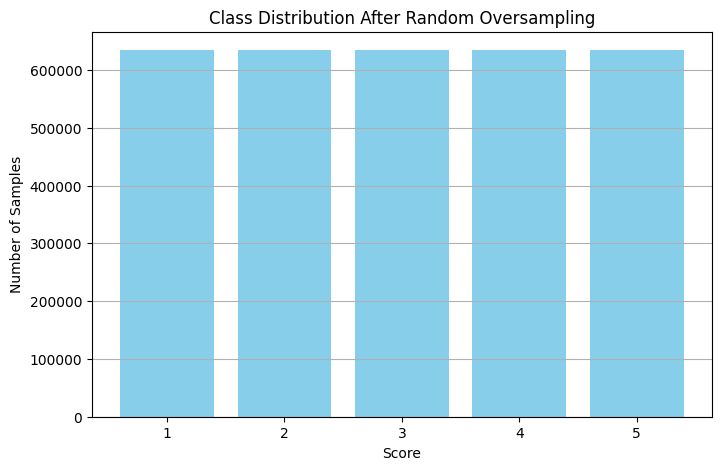

In [11]:
import matplotlib.pyplot as plt
from collections import Counter

# Count occurrences of each class
class_counts = Counter(y_train_oversampled)

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xticks(sorted(class_counts.keys()))
plt.title("Class Distribution After Random Oversampling")
plt.xlabel("Score")
plt.ylabel("Number of Samples")
plt.grid(axis='y')
plt.show()


## Creating your model

Now we train our models.

In [ ]:
"""with open('decision_tree_model.pkl', 'rb') as f:
    model = pickle.load(f)
"""
"""with open('svm_model.pkl', 'rb') as f:
    model = pickle.load(f)
"""



In [12]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train
svm_model = LinearSVC(random_state=42, max_iter=5000)
svm_model.fit(X_train_oversampled, y_train_oversampled)

# Predict on validation set
y_val_pred = svm_model.predict(X_val)

# Evaluate
print(f"✅ Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print("\n📊 Classification Report:\n", classification_report(y_val, y_val_pred))


✅ Validation Accuracy: 0.6061

📊 Classification Report:
               precision    recall  f1-score   support

         1.0       0.42      0.71      0.53     18238
         2.0       0.30      0.42      0.35     17936
         3.0       0.41      0.37      0.39     35216
         4.0       0.45      0.45      0.45     67046
         5.0       0.82      0.73      0.77    158633

    accuracy                           0.61    297069
   macro avg       0.48      0.54      0.50    297069
weighted avg       0.63      0.61      0.61    297069



In [14]:
import pickle

# Suppose `model` is your trained SVM (LinearSVC, LogisticRegression, etc.)
with open("svm_model_2.pkl", "wb") as f:
    pickle.dump(svm_model, f)

print("✅ Model saved as svm_model.pkl")


✅ Model saved as svm_model.pkl


# Fine Tuning

This took too long to run.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter grid to try
param_grid = {
    'C': [0.01, 0.1, 1, 5, 10]
}

# Initialize base model
base_svc = LinearSVC(random_state=42, max_iter=5000)

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=base_svc,
    param_grid=param_grid,
    cv=3,               # 3-fold cross-validation
    scoring='accuracy',
    verbose=2,
    n_jobs=-1           # Use all CPU cores
)

grid_search.fit(X_train_oversampled, y_train_oversampled)

# Best model
best_svc = grid_search.best_estimator_

# Predict using best model
y_val_pred_best = best_svc.predict(X_val)

# Evaluate
print(f"\n✅ Best C: {grid_search.best_params_['C']}")
print(f"✅ Validation Accuracy: {accuracy_score(y_val, y_val_pred_best):.4f}")
print("\n📊 Classification Report:\n", classification_report(y_val, y_val_pred_best))


In [ ]:
with open("svm_model_best.pkl", "wb") as f:
    pickle.dump(best_svc, f)

print("✅ Model saved as svm_model.pkl")

# Evaluation

Import the model from disk.

In [3]:
import pickle
with open('svm_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import LinearSVC

# Use oversampled data for better class balance
X_cv = X_train_oversampled
y_cv = y_train_oversampled


# Define model
model = LinearSVC(random_state=42, C=1.0, max_iter=5000)

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validated predictions (on the training set itself)
y_cv_pred = cross_val_predict(model, X_cv, y_cv, cv=skf)

# --- Evaluation ---
print(f"\n✅ Cross-Validated Accuracy: {accuracy_score(y_cv, y_cv_pred):.4f}")

print("\n📉 Confusion Matrix:")
print(confusion_matrix(y_cv, y_cv_pred))

print("\n📊 Classification Report:")
print(classification_report(y_cv, y_cv_pred))


## Create the Kaggle submission

In [28]:
# Generate predictions using your trained model
y_test_pred = model.predict(X_test)

import pandas as pd

# Create the submission DataFrame
submission_df = pd.DataFrame({
    "Id": test_ids,
    "Score": y_test_pred.astype(int)
})

# Save to CSV
submission_df.to_csv("submission.csv", index=False)

print("✅ submission.csv created successfully!")
print(submission_df.head())


✅ submission.csv created successfully!
        Id  Score
0  1323432      3
1  1137299      5
2  1459366      4
3   931601      5
4  1311995      3


Now you can upload the `submission.csv` to kaggle

In [29]:
!kaggle competitions submit -c cs-506-spring-2025-technical-midterm -f submission.csv -m "First SVM submission"


100%|██████████████████████████████████████| 1.89M/1.89M [00:01<00:00, 1.96MB/s]
Successfully submitted to CS 506 Spring 2025 Technical Midterm